In [4]:
import numpy as np
import matplotlib.pyplot as pl
from scipy.integrate import quad

In [5]:
def ra_to_rad(hours, mins, secs): # taken from footnote 1 from https://physics.stackexchange.com/questions/224950/how-can-i-convert-right-ascension-and-declination-to-distances
    return (hours*15 + mins/4 + secs/240)*np.pi/180
    
def dec_to_rad(degrees, mins, secs):
    return (degrees + mins/60 + secs/3600)*np.pi/180

In [6]:
ra = ra_to_rad(17, 45, 40.04)
dec = dec_to_rad(-29, 0, 28.1)
lambdaL = 30.56*180/np.pi
gammaL = 243.0*180/np.pi
OmegaR = 7.292*1e-5

In [16]:
dec_to_rad(20, 0, 0)

0.3490658503988659

In [7]:
def a(t, gamma, lambda_, delta, alpha, Omega):
    temp0 = 1/16*np.sin(2*gamma)*(3-np.cos(2*lambda_))*\
            (3-np.cos(2*delta))*np.cos(2*(alpha-Omega*t))
    temp1 = -1/4*np.cos(2*gamma)*np.sin(lambda_)*\
            (3-np.cos(2*delta))*np.sin(2*(alpha-Omega*t))
    temp2 = 1/4*np.sin(2*gamma)*np.sin(2*lambda_)*\
            np.sin(2*delta)*np.cos(alpha-Omega*t)
    temp3 = -1/2*np.cos(2*gamma)*np.cos(lambda_)*\
            np.sin(2*delta)*np.sin(alpha-Omega*t)
    temp4 = 3/4*np.sin(2*gamma)*np.cos(lambda_)**2*np.cos(delta)**2
    return temp0 + temp1 + temp2 + temp3 + temp4

def b(t, gamma, lambda_, delta, alpha, Omega):
    temp0 = np.cos(2*gamma)*np.sin(lambda_)*\
            np.sin(delta)*np.cos(2*(alpha-Omega*t))
    temp1 = 1/4*np.sin(2*gamma)*(3-np.cos(2*lambda_))*\
            np.sin(delta)*np.sin(2*(alpha-Omega*t))
    temp2 = np.cos(2*gamma)*np.cos(lambda_)*\
            np.cos(delta)*np.cos(alpha-Omega*t)
    temp3 = 1/2*np.sin(2*gamma)*np.sin(2*lambda_)*\
            np.cos(delta)*np.sin(alpha-Omega*t)
    return temp0+temp1+temp2+temp3

def integrate_func(t, gamma, lambda_, delta, alpha, Omega):
    return a(t, gamma, lambda_, delta, alpha, Omega)**2 + \
            b(t, gamma, lambda_, delta, alpha, Omega)**2

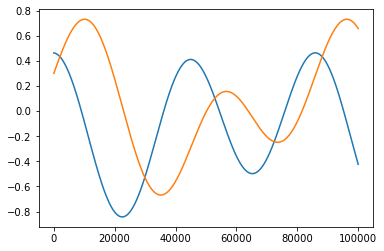

In [8]:
t_space = np.linspace(0, 1e5, 1000)
pl.plot(t_space, a(t_space, gammaL, lambdaL, dec, ra, OmegaR))
pl.plot(t_space, b(t_space, gammaL, lambdaL, dec, ra, OmegaR))

In [14]:
time = 1e8

1/time*quad(integrate_func, 0, time, args=(gammaL, lambdaL, dec, ra, OmegaR))[0]

/home/neil/anaconda3/envs/PBHs/lib/python3.7/site-packages/ipykernel_launcher.py:3: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  This is separate from the ipykernel package so we can avoid doing imports until


0.34179005792679323